# Week11: Homework: Redfield ratio in the P18 cruise
(recycling code from Week 2)

In [1]:
# uncomment the following line if you are using google colab
#! pip install gsw

In [2]:
import gsw
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Download the bottle data in CSV format
(https://cchdo.ucsd.edu/data/14186/33RO20161119_hy1.csv). Read in the bottle data into MATLAB or Python. Use the GSW package to calculate absolute salinity (hint: gsw_SA_from_SP) and conservative temperature (hint: gsw_CT_from_t).

In [3]:
# Step 1 download data from BATS and create data vectors
df=pd.read_csv('https://cchdo.ucsd.edu/data/14186/33RO20161119_hy1.csv',skiprows=149,na_filter=True)
pd.set_option('display.max_columns', 500)
df

,EXPOCODE,SECT_ID,STNNBR,CASTNO,SAMPNO,BTLNBR,BTLNBR_FLAG_W,DATE,TIME,LATITUDE,LONGITUDE,DEPTH,CTDPRS,CTDTMP,CTDSAL,CTDSAL_FLAG_W,SALNTY,SALNTY_FLAG_W,CTDOXY,CTDOXY_FLAG_W,OXYGEN,OXYGEN_FLAG_W,SILCAT,SILCAT_FLAG_W,NITRAT,NITRAT_FLAG_W,NITRIT,NITRIT_FLAG_W,PHSPHT,PHSPHT_FLAG_W,CFC-11,CFC-11_FLAG_W,CFC-12,CFC-12_FLAG_W,TCARBN,TCARBN_FLAG_W,ALKALI,ALKALI_FLAG_W,PH_SWS,PH_SWS_FLAG_W,PH_TMP,POC,POC_FLAG_W,PON,PON_FLAG_W,SF6,SF6_FLAG_W
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,METERS,DBAR,ITS-90,PSS-78,NaN,PSS-78,NaN,UMOL/KG,NaN,UMOL/KG,NaN,UMOL/KG,NaN,UMOL/KG,NaN,UMOL/KG,NaN,UMOL/KG,NaN,PMOL/KG,NaN,PMOL/KG,NaN,UMOL/KG,NaN,UMOL/KG,NaN,NaN,NaN,DEG C,UG/KG,NaN,UG/KG,NaN,PMOL/KG,NaN
1,33RO20161119,P18,1.0,3.0,1.0,11010.0,2.0,20161124.0,1417.0,22.6884,-110.0001,2619,2641.6,1.8216,34.6618,2.0,34.6650,2.0,99.1,4.0,104.9,2.0,159.2,6.0,38.9,6.0,0.01,6.0,2.729,6.0,0.0094,2.0,0.0063,2.0,2366.1,6.0,2428.2,2.0,7.5127,2.0,25.00,-999.00,9.0,-999.00,9.0,0.0000,2.0
2,33RO20161119,P18,1.0,3.0,2.0,11101.0,2.0,20161124.0,1417.0,22.6884,-110.0001,2619,2350.6,1.8914,34.6537,2.0,34.6670,4.0,93.9,2.0,96.5,2.0,158.1,6.0,39.3,6.0,0.01,6.0,2.758,6.0,0.0090,2.0,0.0063,2.0,2367.5,2.0,2427.2,2.0,7.4893,2.0,25.00,-999.00,9.0,-999.00,9.0,0.0031,2.0
3,33RO20161119,P18,1.0,3.0,3.0,11102.0,2.0,20161124.0,1417.0,22.6884,-110.0001,2619,2100.1,2.0198,34.6435,2.0,34.6469,2.0,85.7,2.0,88.9,2.0,154.3,6.0,39.9,6.0,0.01,6.0,2.802,6.0,-999.0000,9.0,-999.0000,9.0,2368.3,2.0,2421.6,6.0,7.4699,2.0,25.00,-999.00,9.0,-999.00,9.0,-999.0,9.0
4,33RO20161119,P18,1.0,3.0,4.0,11103.0,2.0,20161124.0,1417.0,22.6884,-110.0001,2619,1924.7,2.2525,34.6298,2.0,34.6351,2.0,72.4,2.0,76.6,2.0,151.2,6.0,40.7,6.0,0.01,6.0,2.884,6.0,0.0099,6.0,0.0041,6.0,2371.6,2.0,2419.5,2.0,7.4472,2.0,25.00,-999.00,9.0,-999.00,9.0,0.0112,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5096,33RO20161119,P18,212.0,1.0,21.0,11119.0,2.0,20170129.0,245.0,-68.0668,-94.9996,4429,90.7,-1.6019,33.8763,2.0,33.8789,2.0,338.4,2.0,336.7,2.0,41.7,2.0,28.2,2.0,0.27,2.0,2.029,2.0,-999.0000,9.0,-999.0000,9.0,2177.1,2.0,2286.5,2.0,7.6345,2.0,25.00,-999.00,9.0,-999.00,9.0,-999.0,9.0
5097,33RO20161119,P18,212.0,1.0,22.0,11120.0,2.0,20170129.0,245.0,-68.0668,-94.9996,4429,34.1,-0.3206,33.5649,2.0,33.5661,2.0,368.2,2.0,368.1,2.0,21.6,2.0,23.6,2.0,0.23,2.0,1.674,2.0,-999.0000,9.0,-999.0000,9.0,2132.9,2.0,2271.2,6.0,7.7148,2.0,25.00,-999.00,9.0,-999.00,9.0,-999.0,9.0
5098,33RO20161119,P18,212.0,1.0,23.0,11121.0,2.0,20170129.0,245.0,-68.0668,-94.9996,4429,17.9,1.7837,33.4734,2.0,33.4775,2.0,338.9,2.0,336.7,2.0,19.1,2.0,22.6,2.0,0.36,2.0,1.521,2.0,-999.0000,9.0,-999.0000,9.0,2126.5,2.0,2265.8,2.0,7.7181,6.0,25.00,-999.00,9.0,-999.00,9.0,-999.0,9.0
5099,33RO20161119,P18,212.0,1.0,24.0,11122.0,2.0,20170129.0,245.0,-68.0668,-94.9996,4429,3.3,1.6050,32.9924,2.0,32.9924,2.0,335.1,2.0,334.2,2.0,25.6,2.0,22.9,2.0,0.43,2.0,1.503,2.0,-999.0000,9.0,-999.0000,9.0,2102.5,6.0,2228.4,2.0,7.7020,2.0,25.00,-999.00,9.0,-999.00,9.0,-999.0,9.0


In [4]:
# get data so we can calculate sigma-theta
df=df[1:-1]
pres=df['CTDPRS'].to_numpy().astype(float)
sal=df['CTDSAL'].to_numpy().astype(float)
temp=df['CTDTMP'].to_numpy().astype(float)
lon=df['LONGITUDE'].to_numpy().astype(float)
lat=df['LATITUDE'].to_numpy().astype(float)
sflg=df['CTDSAL_FLAG_W'].to_numpy().astype(int)

In [5]:
# first calculate absolute salinity
sa=gsw.SA_from_SP(sal,pres,lon,lat)
# then calculate conservative temperature
ct=gsw.CT_from_t(sa,temp,pres)
# then sigma theta
st=gsw.sigma0(sa,ct)

In [6]:
# now load N, P, O2 and DIC
no3=df['NITRAT'].to_numpy().astype(float)
po4=df['PHSPHT'].to_numpy().astype(float)
o2=df['OXYGEN'].to_numpy().astype(float)
dic=df['TCARBN'].to_numpy().astype(float)
nflg=df['NITRAT_FLAG_W'].to_numpy().astype(int)
pflg=df['PHSPHT_FLAG_W'].to_numpy().astype(int)
oflg=df['OXYGEN_FLAG_W'].to_numpy().astype(int)
cflg=df['TCARBN_FLAG_W'].to_numpy().astype(int)

In [7]:
# define conditions to include data
isgood=(nflg==2)&(pflg==2)&(oflg==2)&(cflg==2)

In [8]:
# define AAIW
isaaiw=(st>26.9)&(st<=27.1)

In [9]:
# define oxygenated waters
oxic=(o2>=40)

## Scatter plot and regression for N vs P

In [10]:
# combine conditions
ind=(isgood==True)#&(isaaiw==True)&(oxic==True)
#
# trim down the data that matches desired conditions
x=po4[ind]
xlab='P'
y=no3[ind]
ylab='N'

### perform type-I linear regression

In [11]:
# calculate covariance matrix
c=np.cov(x,y)
print(c)

[[  0.62390974   9.25641175]
 [  9.25641175 145.96477985]]


In [12]:
a=c[0,1]/c[0,0] # slope
b=np.mean(y)-a*np.mean(x) # intercept
# calculate R2 value
r2=c[0,1]**2/c[0,0]/c[1,1]

N:P ratio is 14.84 and R2 value is 0.94
P:N ratio is 0.07


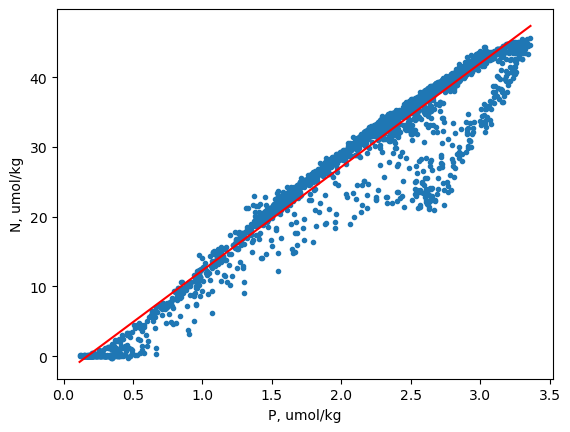

In [13]:
# expand the regression line
x0=np.linspace(min(x),max(x),30)
y0=a*x0+b

# plot the result
plt.plot(x,y,'.')
plt.plot(x0,y0,'r-')
plt.xlabel(xlab+', umol/kg')
plt.ylabel(ylab+', umol/kg')
print(ylab+':'+xlab+' ratio is '+str(a.round(2))+' and R2 value is '+str(r2.round(2)))
print(xlab+':'+ylab+' ratio is '+str((1/a).round(2)))

### perform type-II linear regression

In [14]:
D,V=np.linalg.eig(c)
indx=(D==max(D))

In [15]:
# take the major axis
a = V[1,indx]/V[0,indx]
b=np.mean(y)-a*np.mean(x) # intercept
# calculate R2 value
r2=c[0,1]**2/c[0,0]/c[1,1]

N:P ratio is [15.77] and R2 value is 0.94
P:N ratio is [0.06]


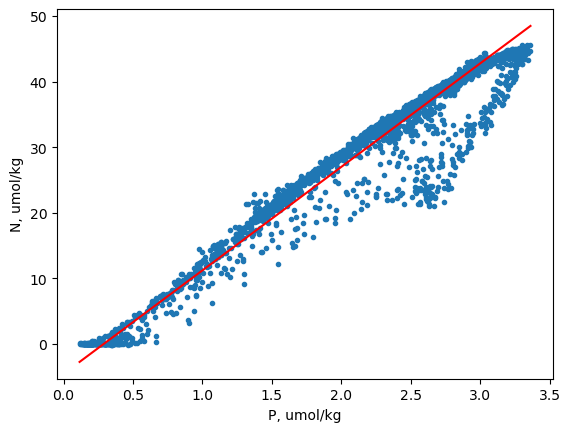

In [16]:
# expand the regression line
x0=np.linspace(min(x),max(x),30)
y0=a*x0+b

# plot the result
plt.plot(x,y,'.')
plt.plot(x0,y0,'r-')
plt.xlabel(xlab+', umol/kg')
plt.ylabel(ylab+', umol/kg')
print(ylab+':'+xlab+' ratio is '+str(a.round(2))+' and R2 value is '+str(r2.round(2)))
print(xlab+':'+ylab+' ratio is '+str((1/a).round(2)))

## Calculating AOU:P ratio

In [17]:
O2sol = gsw.O2sol(sa,ct,pres,lon,lat)
AOU = O2sol - o2

In [18]:
# combine conditions
ind=(isgood==True)&(isaaiw==True)&(oxic==True)
#
# trim down the data that matches desired conditions
x=po4[ind]
xlab='P'
y=AOU[ind]
ylab='AOU'

In [19]:
# calculate covariance matrix
c=np.cov(x,y)
print(c)

[[1.21844368e-01 2.05950078e+01]
 [2.05950078e+01 3.73125266e+03]]


In [20]:
D,V=np.linalg.eig(c)
indx=(D==max(D))

In [21]:
# take the major axis
a = V[1,indx]/V[0,indx]
b=np.mean(y)-a*np.mean(x) # intercept
# calculate R2 value
r2=c[0,1]**2/c[0,0]/c[1,1]

AOU:P ratio is [181.17] and R2 value is 0.93
P:AOU ratio is [0.01]


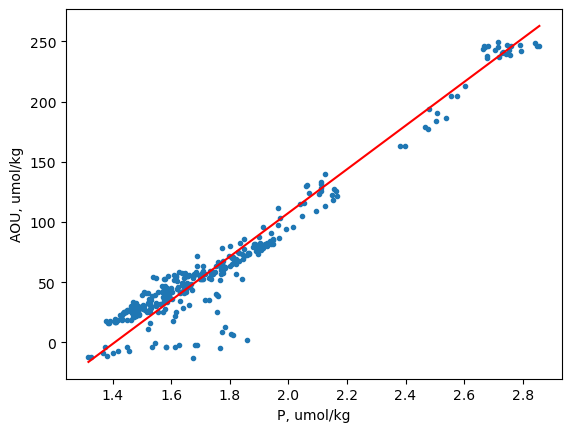

In [22]:
# expand the regression line
x0=np.linspace(min(x),max(x),30)
y0=a*x0+b

# plot the result
plt.plot(x,y,'.')
plt.plot(x0,y0,'r-')
plt.xlabel(xlab+', umol/kg')
plt.ylabel(ylab+', umol/kg')
print(ylab+':'+xlab+' ratio is '+str(a.round(2))+' and R2 value is '+str(r2.round(2)))
print(xlab+':'+ylab+' ratio is '+str((1/a).round(2)))